In [1]:
# organize imports
from __future__ import print_function

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import numpy as np
import h5py
import os
import json
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

C:\deeplearning\anaconda\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# load the user configs
with open('conf/conf.json') as f:    
  config = json.load(f)

In [3]:
# config variables
test_size     = config["test_size"]
seed      = config["seed"]
features_path   = config["features_path"]
labels_path   = config["labels_path"]
results     = config["results"]
classifier_path = config["classifier_path"]
train_path    = config["train_path"]
num_classes   = config["num_classes"]
classifier_path = config["classifier_path"]

In [4]:
# import features and labels
h5f_data  = h5py.File(features_path, 'r')
h5f_label = h5py.File(labels_path, 'r')

features_string = h5f_data['dataset_1']
labels_string   = h5f_label['dataset_1']

features = np.array(features_string)
labels   = np.array(labels_string)

h5f_data.close()
h5f_label.close()

In [5]:
# verify the shape of features and labels
print ("[INFO] features shape: {}".format(features.shape))
print ("[INFO] labels shape: {}".format(labels.shape))

[INFO] features shape: (7830, 131072)
[INFO] labels shape: (7830,)


In [6]:
print ("[INFO] training started...")
# split the training and testing data
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(features),
                                                                  np.array(labels),
                                                                  test_size=test_size,
                                                                  random_state=seed)

[INFO] training started...


In [7]:
print ("[INFO] splitted train and test data...")
print ("[INFO] train data  : {}".format(trainData.shape))
print ("[INFO] test data   : {}".format(testData.shape))
print ("[INFO] train labels: {}".format(trainLabels.shape))
print ("[INFO] test labels : {}".format(testLabels.shape))

[INFO] splitted train and test data...
[INFO] train data  : (7047, 131072)
[INFO] test data   : (783, 131072)
[INFO] train labels: (7047,)
[INFO] test labels : (783,)


In [8]:
# use logistic regression as the model
print ("[INFO] creating model...")
model = LogisticRegression(random_state=seed)
model.fit(trainData, trainLabels)

[INFO] creating model...


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=9, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
# use rank-1 and rank-5 predictions
print ("[INFO] evaluating model...")
f = open(results, "w")
rank_1 = 0
rank_5 = 0

[INFO] evaluating model...


In [10]:
# loop over test data
for (label, features) in zip(testLabels, testData):
  # predict the probability of each class label and
  # take the top-5 class labels
  predictions = model.predict_proba(np.atleast_2d(features))[0]
  predictions = np.argsort(predictions)[::-1][:5]

  # rank-1 prediction increment
  if label == predictions[0]:
    rank_1 += 1

  # rank-5 prediction increment
  if label in predictions:
    rank_5 += 1

In [11]:
# convert accuracies to percentages
rank_1 = (rank_1 / float(len(testLabels))) * 100
rank_5 = (rank_5 / float(len(testLabels))) * 100

In [12]:
# write the accuracies to file
f.write("Rank-1: {:.2f}%\n".format(rank_1))
f.write("Rank-5: {:.2f}%\n\n".format(rank_5))

16

In [13]:
# evaluate the model of test data
preds = model.predict(testData)

In [14]:
# write the classification report to file
f.write("{}\n".format(classification_report(testLabels, preds)))
f.close()

In [15]:
# dump classifier to file
print ("[INFO] saving model...")
pickle.dump(model, open(classifier_path, 'wb'))

[INFO] saving model...


In [16]:
# display the confusion matrix
print ("[INFO] confusion matrix")

[INFO] confusion matrix


In [17]:
# get the list of training lables
labels = sorted(list(os.listdir(train_path)))

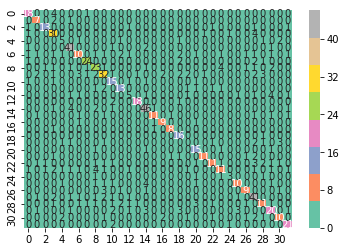

In [18]:
# plot the confusion matrix
cm = confusion_matrix(testLabels, preds)
sns.heatmap(cm,
            annot=True,
            cmap="Set2")
plt.show()